<a href="https://colab.research.google.com/github/Ghostalp07/britishairways/blob/main/BAbooking_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/customer_booking (1).csv', encoding='latin1')

In [3]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [4]:
df.duplicated()
for col in df.columns:
  pct_missing = np.mean(df[col].isnull())
  print('{} - {}%'.format(col, round(pct_missing*100)))

num_passengers - 0%
sales_channel - 0%
trip_type - 0%
purchase_lead - 0%
length_of_stay - 0%
flight_hour - 0%
flight_day - 0%
route - 0%
booking_origin - 0%
wants_extra_baggage - 0%
wants_preferred_seat - 0%
wants_in_flight_meals - 0%
flight_duration - 0%
booking_complete - 0%


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [ ]:
route_freq = df['route'].value_counts()
route_success = df.groupby('route')['booking_complete'].mean()

route_df = pd.DataFrame({
    'count': route_freq,
    'booking_rate': route_success
})

# Filtering for popular routes
popular_routes = route_df[route_df['count'] > 500].sort_values('booking_rate', ascending=False)

summary = {
    "Top Sales Channels by Booking Rate": df.groupby('sales_channel')['booking_complete'].mean().sort_values(ascending=False),
    "Top Trip Types by Frequency": df['trip_type'].value_counts(normalize=True),
    "Top Routes by Booking Rate (min 500 records)": popular_routes.head(10)
}
summary

<Axes: xlabel='booking_complete', ylabel='count'>

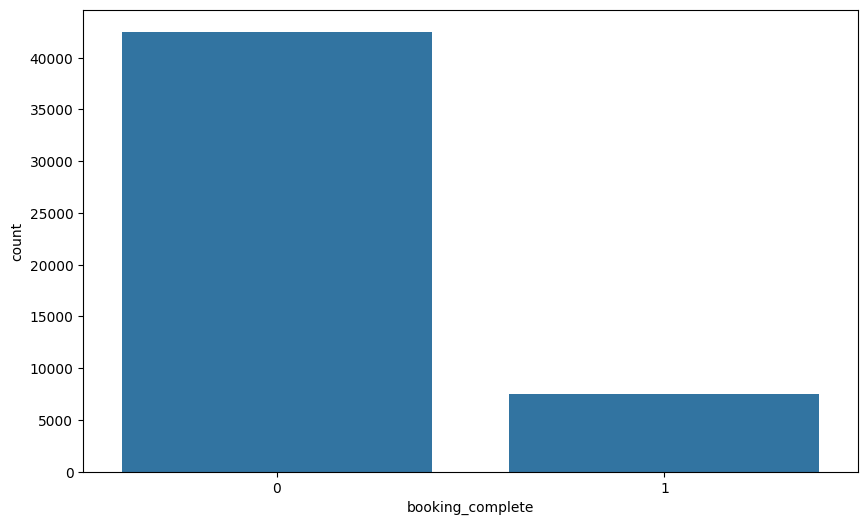

In [11]:
df['booking_complete']
plt.figure(figsize=(10,6))
sns.countplot(x='booking_complete',data=df)

<Axes: xlabel='sales_channel', ylabel='count'>

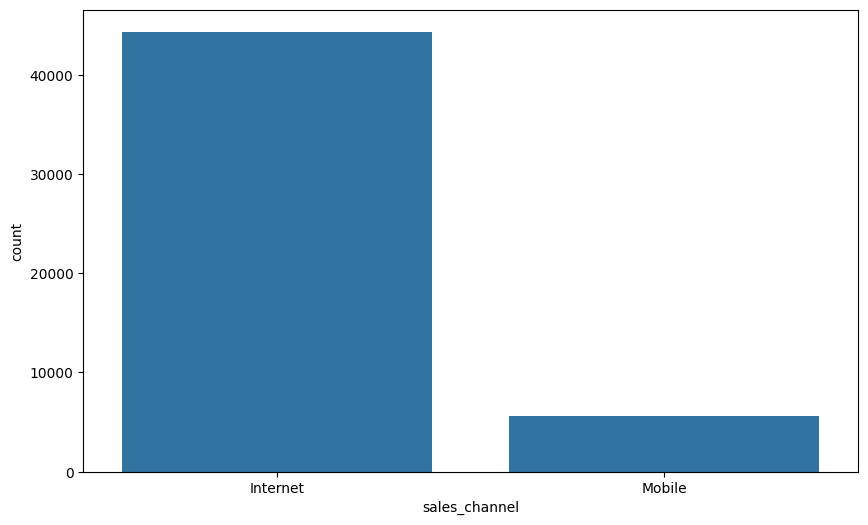

In [21]:
df['sales_channel']
plt.figure(figsize=(10,6))
sns.countplot(x='sales_channel',data=df)

In [45]:
# Count bookings by sales channel
df.groupby('sales_channel')['booking_complete'].value_counts(normalize=True).unstack().sort_values(1, ascending=False)


booking_complete,0,1
sales_channel,,
0,0.845230,0.154770
1,0.891598,0.108402


In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier

le = LabelEncoder()

In [19]:
for col in df.columns:
  if df[col].dtype == 'object':
    print(col)

sales_channel
trip_type
flight_day
route
booking_origin


In [23]:
for col in df.columns:
  if df[col].dtype =='int':
    print(col)

num_passengers
purchase_lead
length_of_stay
flight_hour
wants_extra_baggage
wants_preferred_seat
wants_in_flight_meals
booking_complete


In [27]:
df['booking_complete'].value_counts()

,count
booking_complete,
0,42522
1,7478


In [28]:
for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = le.fit_transform(df[col])

In [31]:
df.drop('wants_in_flight_meals',axis=1)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,flight_duration,booking_complete
0,2,0,2,262,19,7,2,0,61,1,0,5.52,0
1,1,0,2,112,20,3,2,0,61,0,0,5.52,0
2,2,0,2,243,22,17,6,0,36,1,1,5.52,0
3,1,0,2,96,31,4,2,0,61,0,0,5.52,0
4,2,0,2,68,22,15,6,0,36,1,0,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,0,2,27,6,9,2,720,4,1,0,5.62,0
49996,1,0,2,111,6,4,3,720,4,0,0,5.62,0
49997,1,0,2,24,6,22,2,720,4,0,0,5.62,0
49998,1,0,2,15,6,11,1,720,4,1,0,5.62,0


In [32]:
df.drop('booking_origin',axis=1)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,2,262,19,7,2,0,1,0,0,5.52,0
1,1,0,2,112,20,3,2,0,0,0,0,5.52,0
2,2,0,2,243,22,17,6,0,1,1,0,5.52,0
3,1,0,2,96,31,4,2,0,0,0,1,5.52,0
4,2,0,2,68,22,15,6,0,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,0,2,27,6,9,2,720,1,0,1,5.62,0
49996,1,0,2,111,6,4,3,720,0,0,0,5.62,0
49997,1,0,2,24,6,22,2,720,0,0,1,5.62,0
49998,1,0,2,15,6,11,1,720,1,0,1,5.62,0


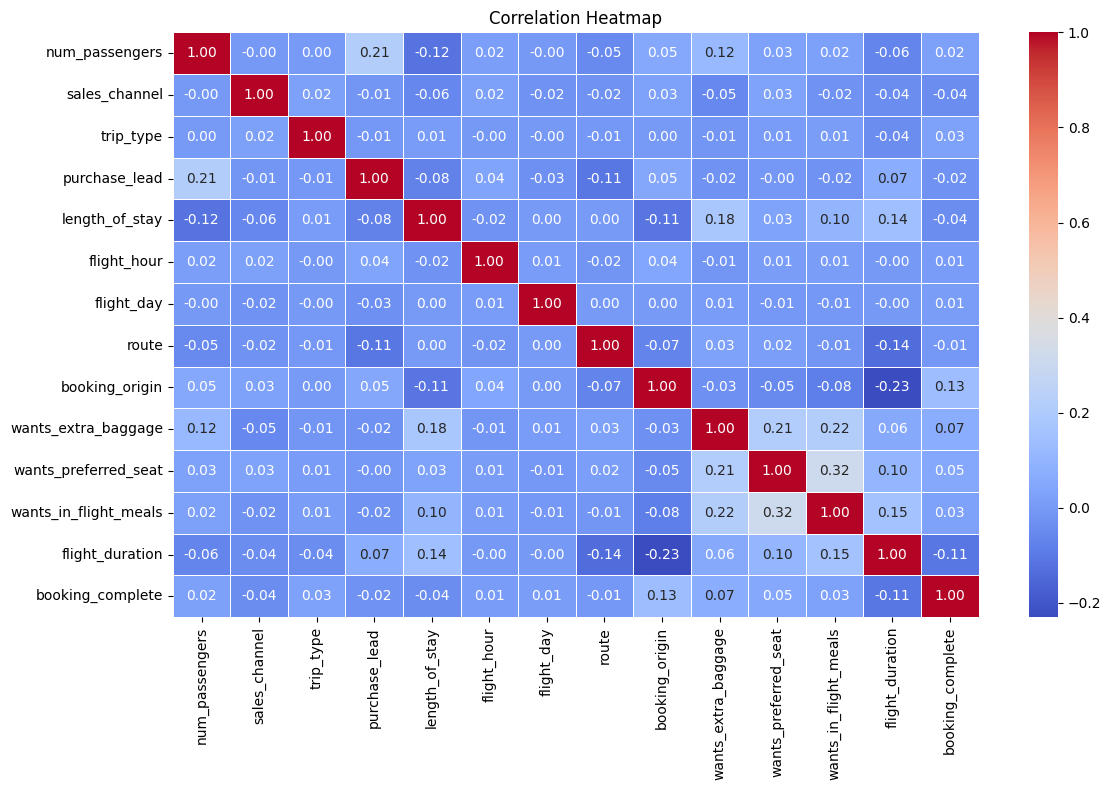

In [33]:
plt.figure(figsize=(12, 8))
corr_matrix = df.corr(numeric_only=True)

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [74]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [75]:
x = df.drop('booking_complete',axis=1)
y = df['booking_complete']

X_test, X_train, y_test, y_train = train_test_split(x, y, test_size=0.3, random_state=42)

In [76]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [77]:
from sklearn.ensemble import RandomForestClassifier
randomforest =RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight='balanced',
    random_state=42,

)

In [81]:
randomforest.fit(X_train_smote, y_train_smote)
y_pred = randomforest.predict(X_test)

In [82]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


feature_importance = pd.DataFrame({
    'Feature': x.columns,
    'Importance': randomforest.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance.head(10))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     29738
           1       0.32      0.31      0.32      5262

    accuracy                           0.80     35000
   macro avg       0.60      0.60      0.60     35000
weighted avg       0.79      0.80      0.80     35000


Confusion Matrix:
[[26306  3432]
 [ 3635  1627]]

Feature Importance:
                  Feature  Importance
8          booking_origin    0.168616
7                   route    0.146131
3           purchase_lead    0.142002
12        flight_duration    0.125192
4          length_of_stay    0.115518
5             flight_hour    0.098429
6              flight_day    0.074131
0          num_passengers    0.035357
1           sales_channel    0.034333
11  wants_in_flight_meals    0.021953


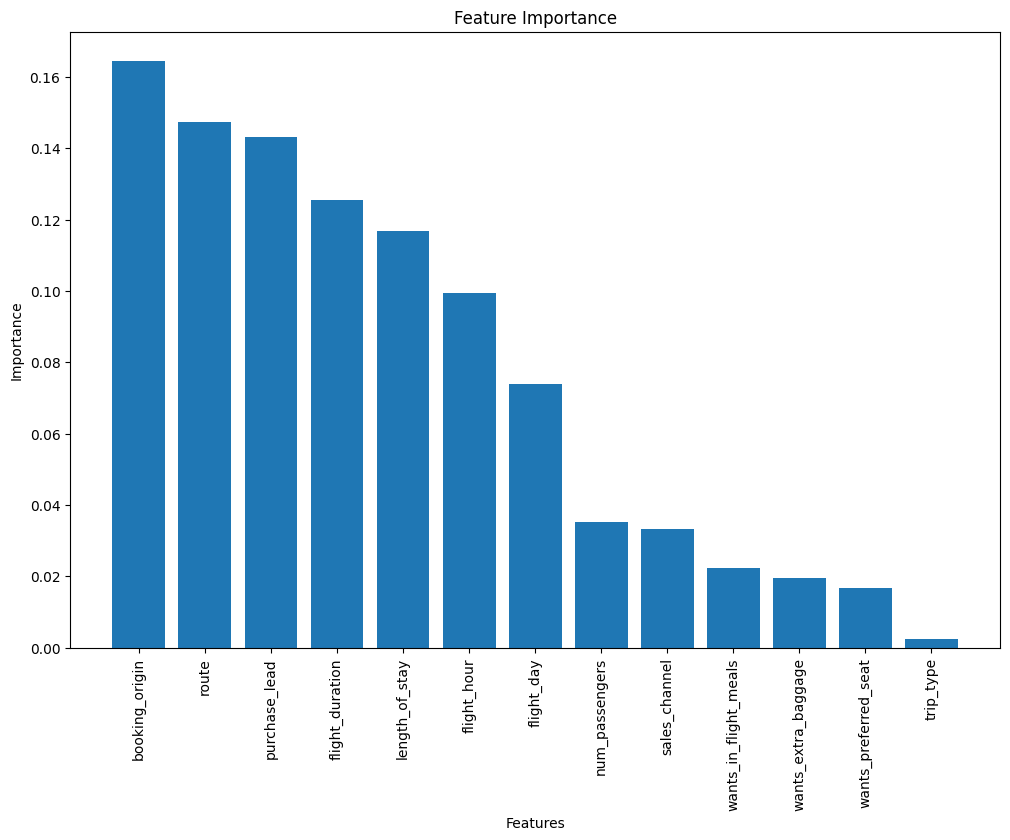

In [60]:
plt.figure(figsize=(12, 8))
plt.bar(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=90)
plt.show()

In [83]:
import xgboost as xgb

In [84]:

xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train_smote, y_train_smote)

y_pred_xgb = xgb_model.predict(X_test)

In [86]:
print(classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87     29738
           1       0.33      0.39      0.36      5262

    accuracy                           0.79     35000
   macro avg       0.61      0.63      0.62     35000
weighted avg       0.80      0.79      0.80     35000


Confusion Matrix:
[[25541  4197]
 [ 3191  2071]]


In [94]:
from sklearn.model_selection import cross_val_score

# For Random Forest
cv_scores_rf = cross_val_score(randomforest, x, y, cv=5, scoring='f1')
print("Random Forest F1 CV Scores:", cv_scores_rf)
print("Average F1 Score:", cv_scores_rf.mean())

# For XGBoost
from xgboost import XGBClassifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
cv_scores_xgb = cross_val_score(xgb_model, x, y, cv=5, scoring='f1')
print("XGBoost F1 CV Scores:", cv_scores_xgb)
print("Average F1 Score:", cv_scores_xgb.mean())


Random Forest F1 CV Scores: [0.00666667 0.0859452  0.00907893 0.00286807 0.2735799 ]
Average F1 Score: 0.07562775220864257


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:21:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:21:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:21:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:21:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:21:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost F1 CV Scores: [0.00400534 0.04267299 0.00176234 0.00283242 0.22472256]
Average F1 Score: 0.05519912911102918


another way of achieving it (better and sys provided)
